In [37]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\20208463\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\20208463\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Import tweepy to work with the twitter API
import tweepy as tw

# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd

# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt

In [4]:
consumer_key = 'YNyiyE5ibJ86TbhBDoFCpEsBu'
consumer_secret = 'cE63ZCAiiNBYogYUNwjwGgB2jOVBxvZkkPOfwm7SPMa6Eocb6V'
access_token = '748789075-E190Pda4cc7GQr4KQyUczGy9QtoMMPiSEkEm5uKP'
access_token_secret = 'aAlExkHR84ij1SQpw3wZpsBg1WCNxYv5yUWchyDHya8YN'

In [5]:
# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)

In [42]:
cursor = tw.Cursor(api.user_timeline, id = 'benshapiro', tweet_mode = "extended").items(1000)

In [43]:
tweets = [{'Tweet':tweet.full_text} for tweet in cursor]
print(tweets)

Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


[{'Tweet': 'RT @wil_da_beast630: @okcomputer220 Not sure this is an own. \n\nBy our "combined taxes should be under 55%" standards in \'Merica, these look…'}, {'Tweet': 'RT @wil_da_beast630: Fatherlessness is the biggest and most under-discussed problem in the USA. \n\nThe out-of-wedlock birth rate in the USA…'}, {'Tweet': 'Least shocking news of the day https://t.co/WtGpANS0ql'}, {'Tweet': 'RT @Julio_Rosas11: As someone who was in Kenosha on the night of the Kyle Rittenhouse shootings, I can say the media has been trying to rew…'}, {'Tweet': 'RT @JacquiHeinrich: 🚨NEW: Dems to drop paid family and medical leave from reconciliation bill. A source close to the talks tells me, “Manch…'}, {'Tweet': 'RT @DailyMail: How did Florida end up with one of the best COVID-19 case and death rates in the US? https://t.co/ACSZJg3xPo https://t.co/UY…'}, {'Tweet': 'Welcome to the Free State of Florida https://t.co/N62aT0tfoI'}, {'Tweet': 'RT @Ravarora1: The incongruity here is quite striking.\n\n@IlhanM

In [127]:
df_tweet = pd.DataFrame.from_dict(tweets)
df_tweet.head()

,Tweet
0,RT @wil_da_beast630: @okcomputer220 Not sure t...
1,RT @wil_da_beast630: Fatherlessness is the big...
2,Least shocking news of the day https://t.co/Wt...
3,RT @Julio_Rosas11: As someone who was in Kenos...
4,RT @JacquiHeinrich: 🚨NEW: Dems to drop paid fa...


In [128]:

# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob



In [129]:
stop_words = stopwords.words('english')
custom_stopwords = ['RT','']

In [130]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df_tweet['Tweet'] = df_tweet['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df_tweet.head()

,Tweet
0,@wil_da_beast630: @okcomputer220 Not sure own....
1,@wil_da_beast630: Fatherlessness biggest under...
2,Least shocking news day https://t.co/WtGpANS0ql
3,@Julio_Rosas11: As someone Kenosha night Kyle ...
4,@JacquiHeinrich: 🚨NEW: Dems drop paid family m...


In [131]:
df1 = df_tweet.to_string()

df_split = df1.split()

df_split

all_sentences = []

for word in df_split:
    all_sentences.append(word)

all_sentences

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)

In [132]:
#print(lines)

In [133]:
import re

In [134]:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        word = word.lower()
        lines2.append(word)
            

In [135]:
# #This is stemming the words to their root
# from nltk.stem.snowball import SnowballStemmer

# # The Snowball Stemmer requires that you pass a language parameter
# s_stemmer = SnowballStemmer(language='english')

# stem = []
# for word in lines2:
#     stem.append(s_stemmer.stem(word))
    
# #stem

In [136]:
#Removing all Stop Words

stem2 = []

stem = lines2 # Remove this if you want stemming

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

#stem2

In [137]:
df_count = pd.DataFrame(stem2)

df_count = df_count[0].value_counts()

In [138]:
df_count.head()

realdailywire    46
benshapiro       32
kerpen           31
new              30
biden            24
Name: 0, dtype: int64

In [139]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

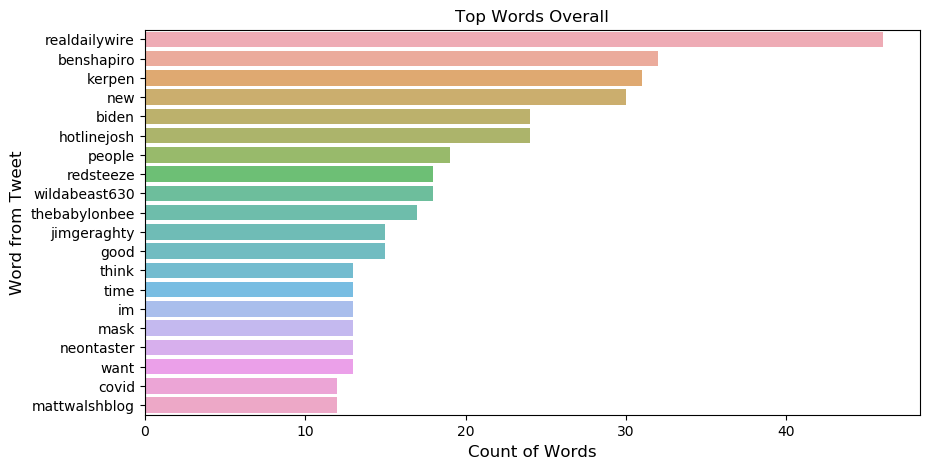

In [140]:

#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df_count = df_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df_count.values, df_count.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [141]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [142]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [143]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

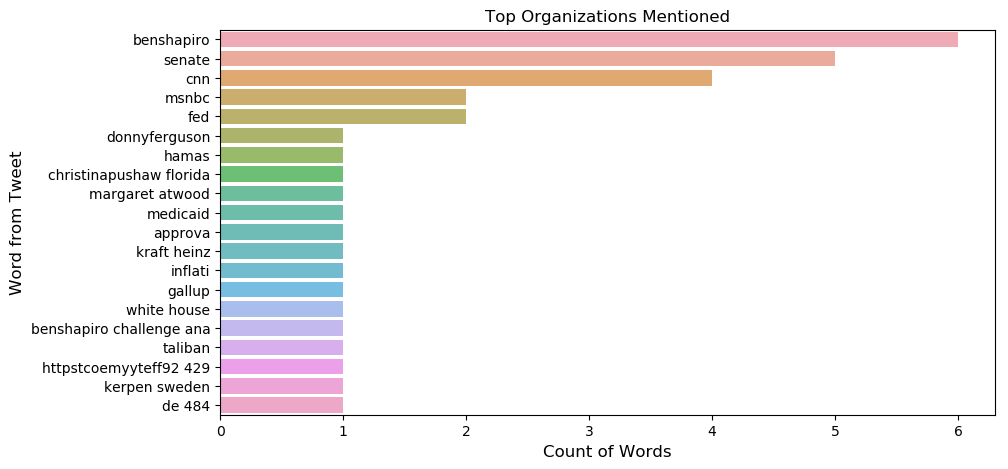

In [144]:
df_count = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df_count.values, df_count.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [145]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

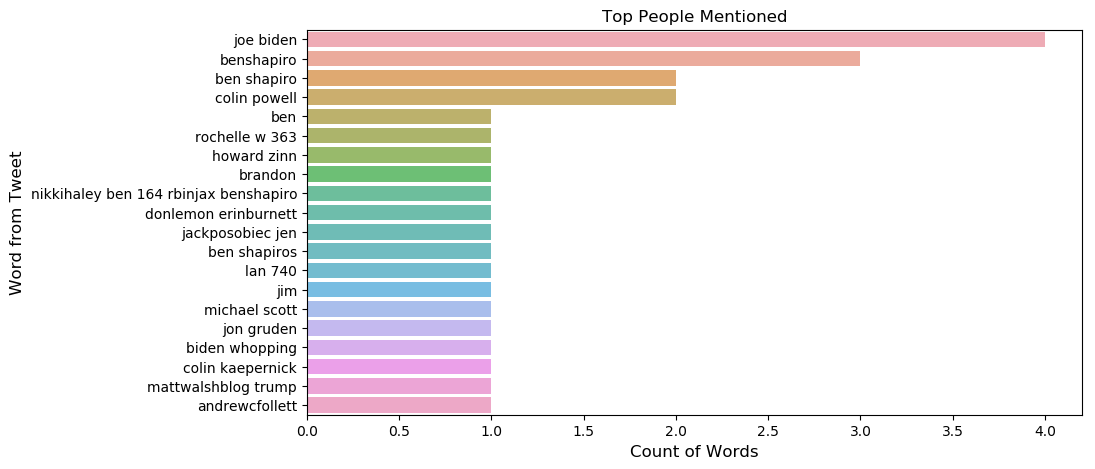

In [146]:
df_count = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df_count.values, df_count.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [147]:
df_tweet.head()

,Tweet
0,@wil_da_beast630: @okcomputer220 Not sure own....
1,@wil_da_beast630: Fatherlessness biggest under...
2,Least shocking news day https://t.co/WtGpANS0ql
3,@Julio_Rosas11: As someone Kenosha night Kyle ...
4,@JacquiHeinrich: 🚨NEW: Dems drop paid family m...


In [148]:
df_tweet['polarity'] = df_tweet['Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df_tweet['subjectivity'] = df_tweet['Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [149]:
df_tweet.head()

,Tweet,polarity,subjectivity
0,@wil_da_beast630: @okcomputer220 Not sure own....,0.116667,0.62963
1,@wil_da_beast630: Fatherlessness biggest under...,0.000000,0.00000
2,Least shocking news day https://t.co/WtGpANS0ql,-0.650000,0.70000
3,@Julio_Rosas11: As someone Kenosha night Kyle ...,0.000000,0.00000
4,@JacquiHeinrich: 🚨NEW: Dems drop paid family m...,0.000000,0.00000


In [150]:
def getAnalysis(score):
    if score < 0:
        return '‘Negative’'
    elif score == 0:
        return '‘Neutral’'
    else:
        return '‘Positive’'
df_tweet['TextBlob_Analysis'] = df_tweet['polarity'].apply(getAnalysis)

In [151]:
df_tweet.head()

,Tweet,polarity,subjectivity,TextBlob_Analysis
0,@wil_da_beast630: @okcomputer220 Not sure own....,0.116667,0.62963,‘Positive’
1,@wil_da_beast630: Fatherlessness biggest under...,0.000000,0.00000,‘Neutral’
2,Least shocking news day https://t.co/WtGpANS0ql,-0.650000,0.70000,‘Negative’
3,@Julio_Rosas11: As someone Kenosha night Kyle ...,0.000000,0.00000,‘Neutral’
4,@JacquiHeinrich: 🚨NEW: Dems drop paid family m...,0.000000,0.00000,‘Neutral’


In [152]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
Tweet                1000 non-null object
polarity             1000 non-null float64
subjectivity         1000 non-null float64
TextBlob_Analysis    1000 non-null object
dtypes: float64(2), object(2)
memory usage: 31.3+ KB


In [153]:
df_tweet_count = df_tweet['TextBlob_Analysis'].value_counts()

In [155]:
df_tweet_count

‘Neutral’     410
‘Positive’    396
‘Negative’    194
Name: TextBlob_Analysis, dtype: int64

In [157]:
df_tweet['polarity'].mean()

0.07079674152236635

In [158]:
df_tweet['subjectivity'].mean()

0.352654548160173